In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('nonvoters2_wrangled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Columns: 119 entries, Unnamed: 0 to voter_category
dtypes: float64(23), int64(91), object(5)
memory usage: 5.3+ MB


In [4]:
df.head()

Unnamed: 0  RespId  weight  Q2_1  Q2_2  Q2_3  Q2_4  Q2_5  Q2_6  Q2_7  ...  \
0           0  470001  0.7516     1     1     2     4     1     4     2  ...   
1           1  470002  1.0267     1     2     2     3     1     1     2  ...   
2           2  470003  1.0844     1     1     2     2     1     1     2  ...   
3           3  470007  0.6817     1     1     1     3     1     1     1  ...   
4           4  480008  0.9910     1     1    -1     1     1     1     1  ...   

   Q30  Q31  Q32  Q33  ppage                 educ   race  gender  \
0    2  NaN  1.0  NaN     73              College  White  Female   
1    3  NaN  NaN  1.0     90              College  White  Female   
2    2  NaN  2.0  NaN     53              College  White    Male   
3    2  NaN  1.0  NaN     58         Some college  Black  Female   
4    1 -1.0  NaN  NaN     81  High school or less  White    Male   

      income_cat  voter_category  
0       $75-125k          always  
1  $125k or more          always  
2  $125k or more        sporadic  
3        $40-75k        sporadic  
4        $40-75k          always  

[5 rows x 119 columns]

In [6]:
df.Q2_1.value_counts()

 1    4758
 2     738
 4     160
 3     145
-1      35
Name: Q2_1, dtype: int64

In [7]:
df.Q2_2.value_counts()

 1    2811
 2    2068
 3     644
 4     277
-1      36
Name: Q2_2, dtype: int64

In [18]:
def sample(dataframe, n=100):
    ints = np.random.randint(0,5836,n)
    sample_df = dataframe.iloc[ints]
    return sample_df

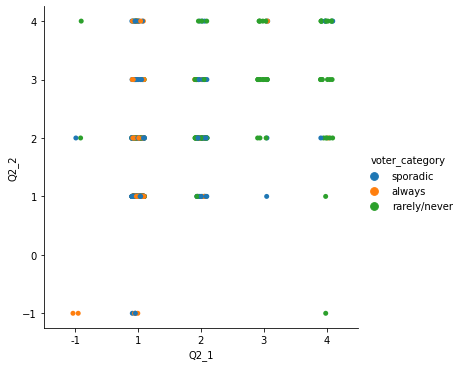

In [27]:
sample1000 = sample(df,1000)
_ = sns.catplot(x="Q2_1", y="Q2_2", hue='voter_category',data=sample1000)
plt.show()

In [99]:
columnpair_df = df.loc[:,['Q2_1','Q2_2']]
columnpair_df['count']=1
#columnpair_df.count.astype(int)
#print(columnpair_df.head())

In [118]:
pivot = pd.pivot_table(columnpair_df, values='count', index=['Q2_1'],
                       columns=['Q2_2'], aggfunc=np.sum)
print(pivot)

Q2_2    -1       1       2      3      4
Q2_1                                    
-1    10.0    11.0     8.0    4.0    2.0
 1    22.0  2671.0  1586.0  368.0  111.0
 2     3.0   111.0   390.0  183.0   51.0
 3     NaN    10.0    55.0   56.0   24.0
 4     1.0     8.0    29.0   33.0   89.0


In [126]:
pivot.fillna(value=0, inplace=True)
pivot = pivot.astype(int)
print(pivot)

Q2_2  -1     1     2    3    4
Q2_1                          
-1    10    11     8    4    2
 1    22  2671  1586  368  111
 2     3   111   390  183   51
 3     0    10    55   56   24
 4     1     8    29   33   89


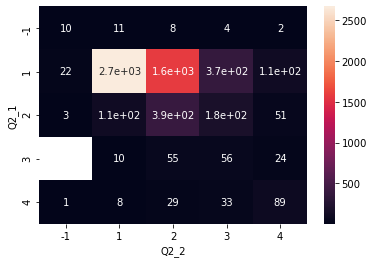

In [83]:
_ = sns.heatmap(pivot, annot=True)
plt.show()

In [62]:
heat_example = pd.DataFrame({'A':[1,1,1,2,2,2,3,3,3],'B':[4,5,6,4,5,6,4,5,6],'C':[1,2,3,4,5,6,7,8,9]})

In [63]:
print(heat_example)

   A  B  C
0  1  4  1
1  1  5  2
2  1  6  3
3  2  4  4
4  2  5  5
5  2  6  6
6  3  4  7
7  3  5  8
8  3  6  9


In [64]:
pivot = heat_example.pivot('A','B','C')
print(pivot)

B  4  5  6
A         
1  1  2  3
2  4  5  6
3  7  8  9


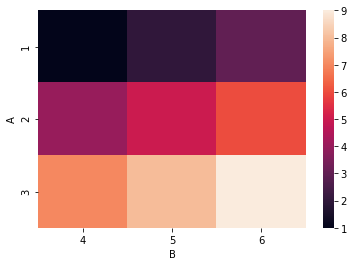

In [65]:
_ = sns.heatmap(pivot)

In [127]:
def make_heatmap(df,col1,col2, normcol=False):
    columnpair_df = df.loc[:,[col1,col2]]
    columnpair_df['count']=1
    pivot = pd.pivot_table(columnpair_df, values='count', index=col1,
                       columns=col2, aggfunc=np.sum)
    pivot.fillna(value=0, inplace=True)
    pivot = pivot.astype(int)
    if normcol==True:
        for i in pivot.columns:
            sum = pivot[i].sum()
            pivot[i] = (pivot[i]/sum)*10000
    _ = sns.heatmap(pivot, annot=True)
    return plt.show()

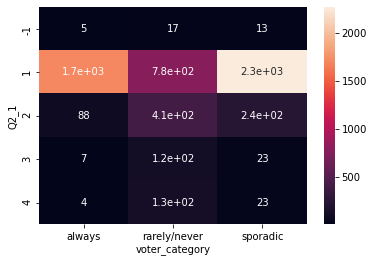

In [128]:
make_heatmap(df, 'Q2_1', 'voter_category')

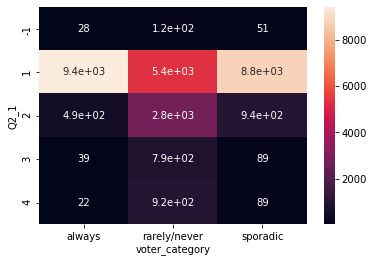

In [129]:
make_heatmap(df, 'Q2_1', 'voter_category', normcol=True)

In [97]:
features = []
for i in df.columns:
    features.append(i)
features = features[3:]
features.pop()

['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q14', 'Q15', 'Q16', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7', 'Q19_8', 'Q19_9', 'Q19_10', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27_1', 'Q27_2', 'Q27_3', 'Q27_4', 'Q27_5', 'Q27_6', 'Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7', 'Q28_8', 'Q29_1', 'Q29_2', 'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7', 'Q29_8', 'Q29_9', 'Q29_10', 'Q30', 'Q31', 'Q32', 'Q33', 'ppage', 'educ', 'race', 'gender', 'income_cat']


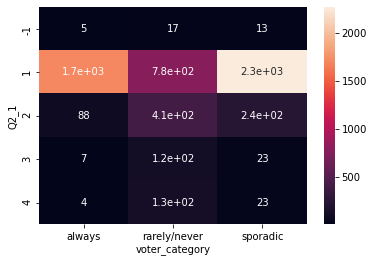

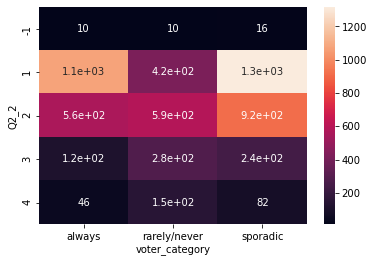

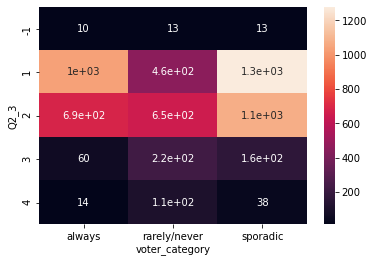

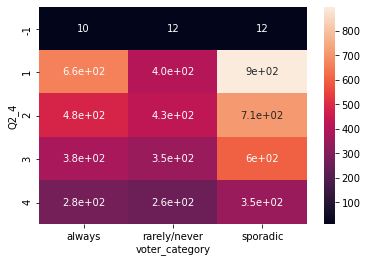

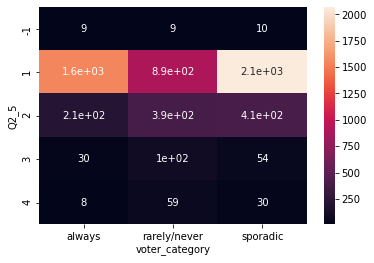

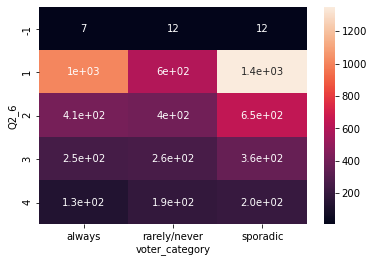

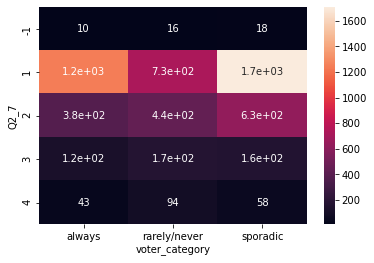

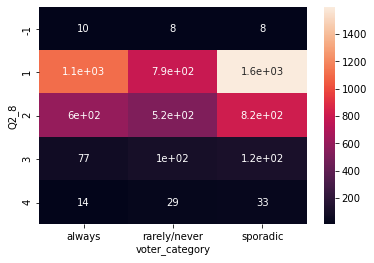

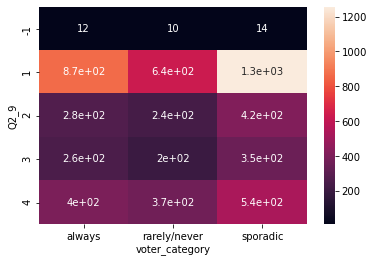

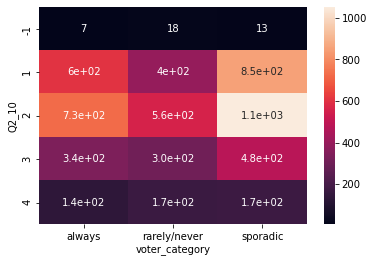

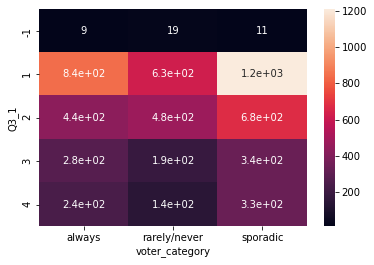

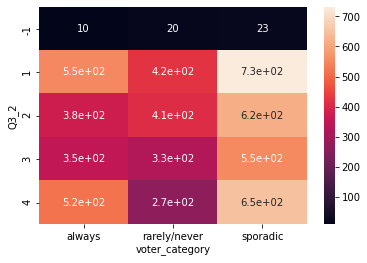

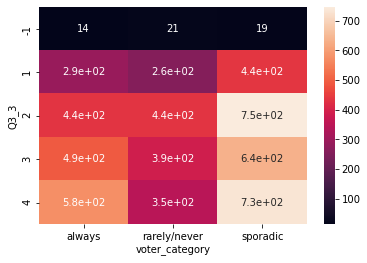

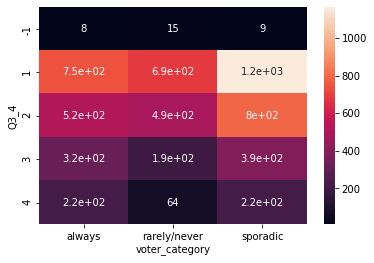

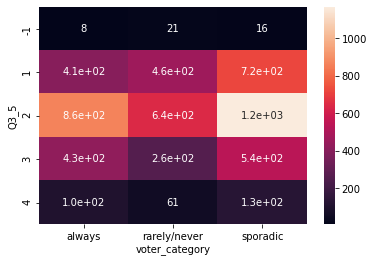

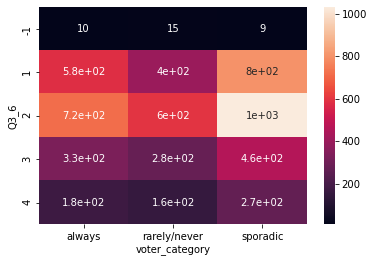

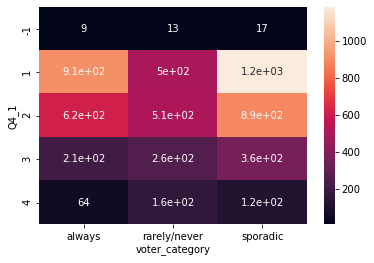

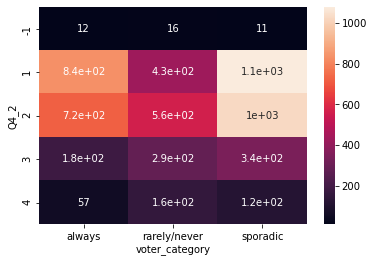

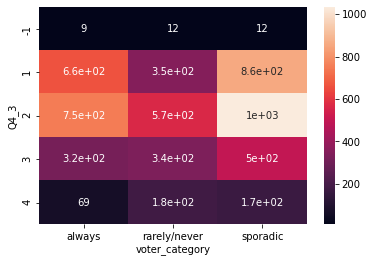

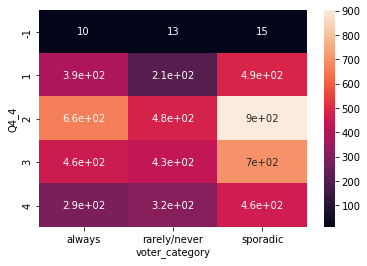

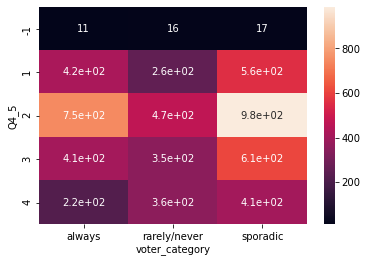

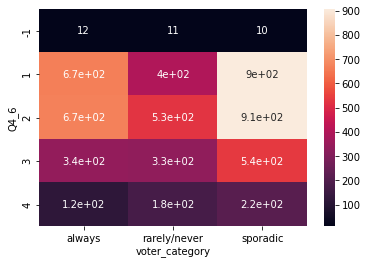

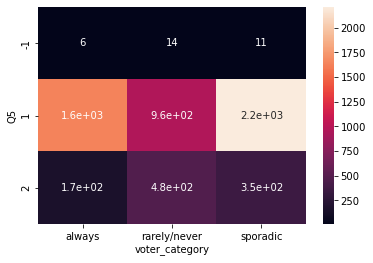

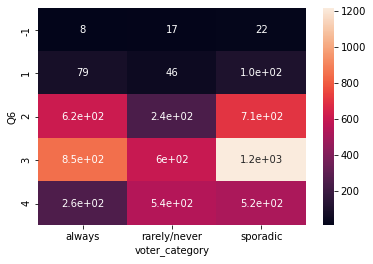

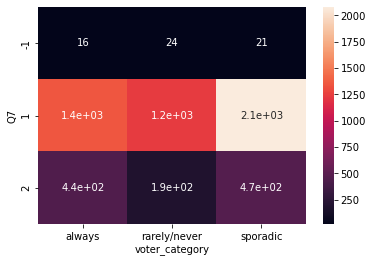

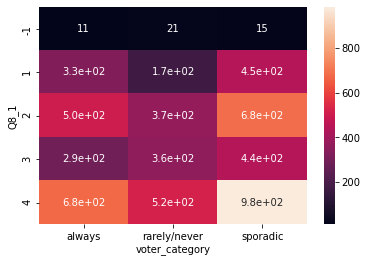

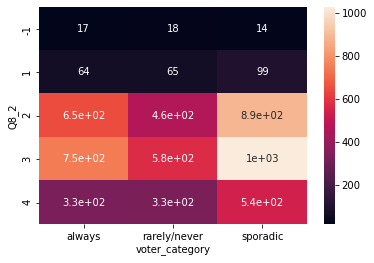

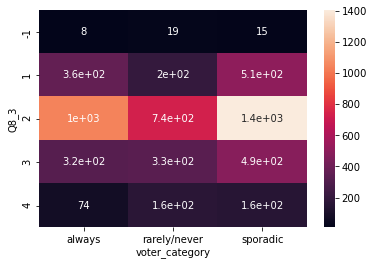

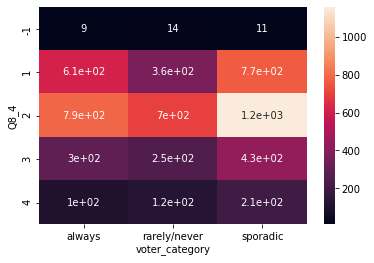

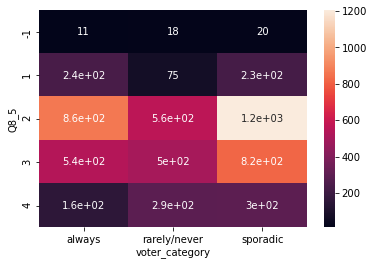

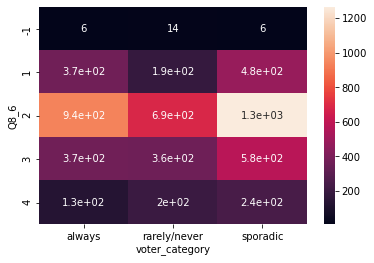

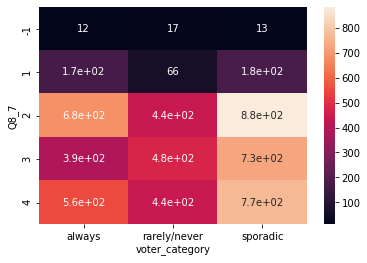

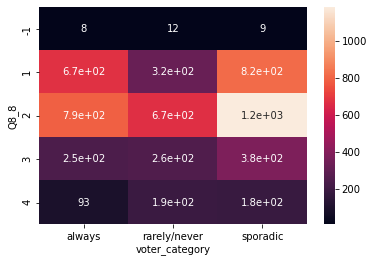

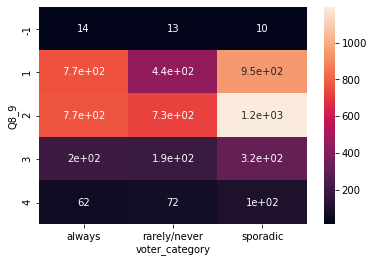

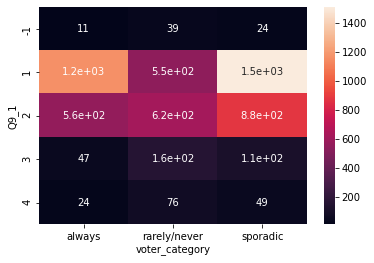

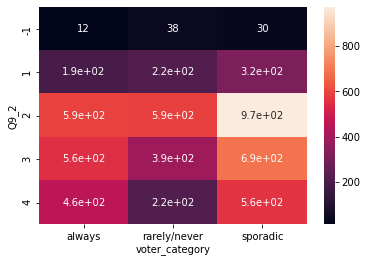

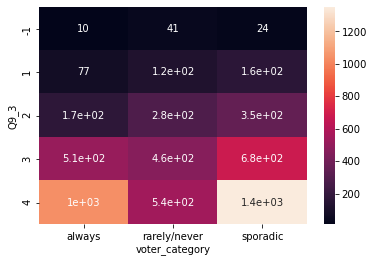

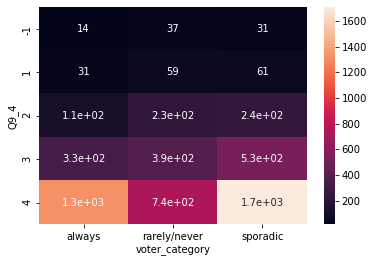

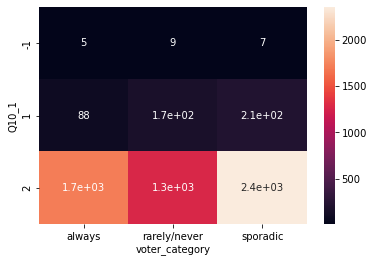

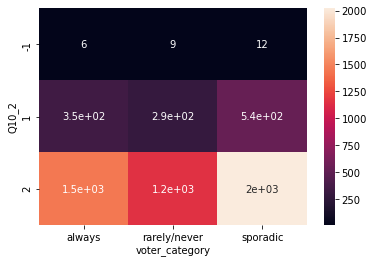

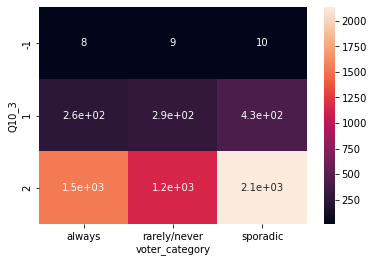

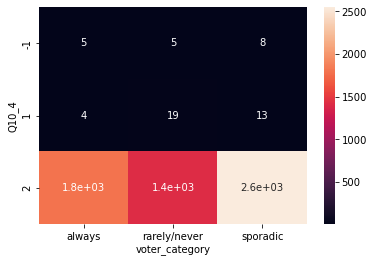

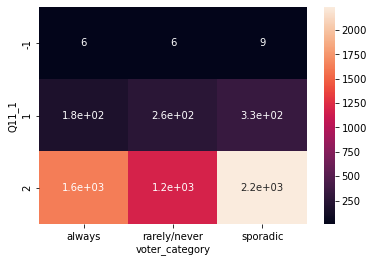

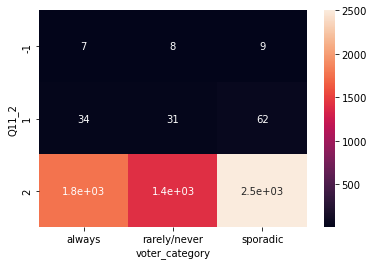

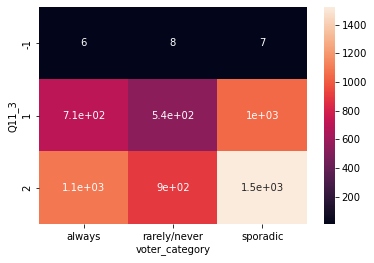

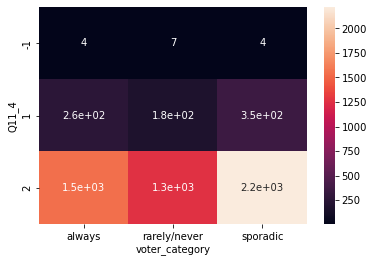

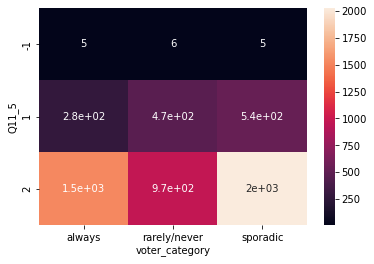

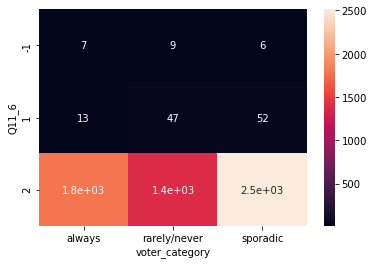

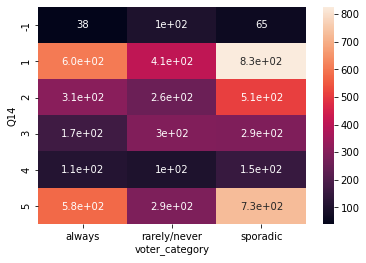

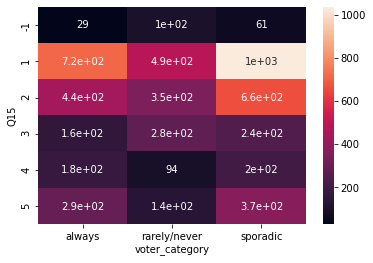

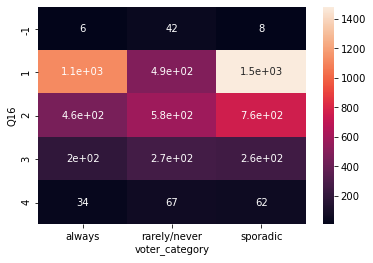

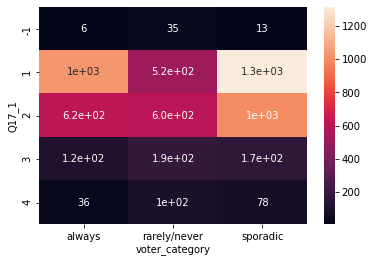

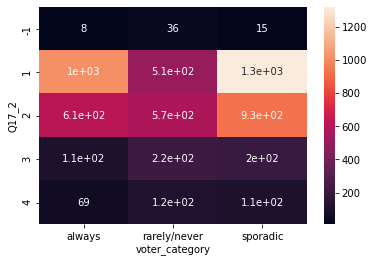

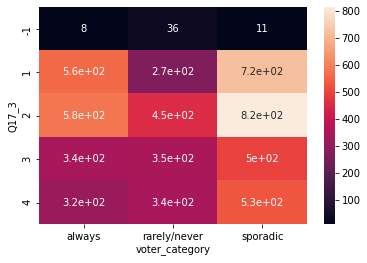

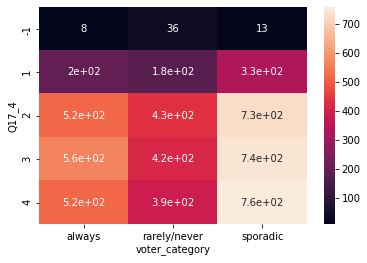

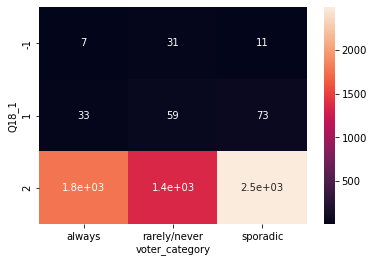

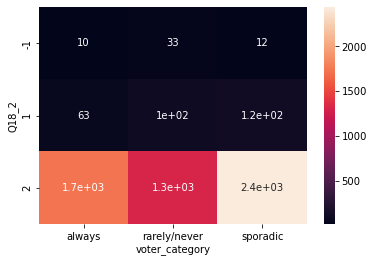

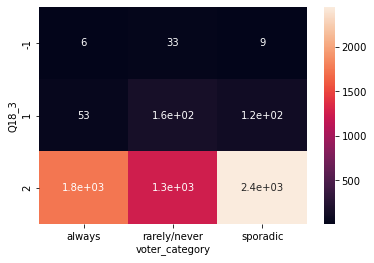

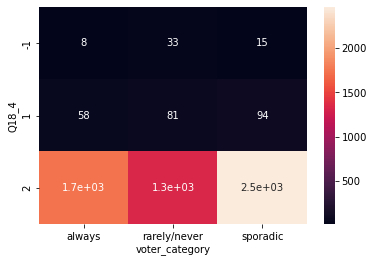

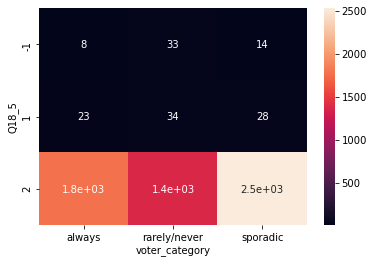

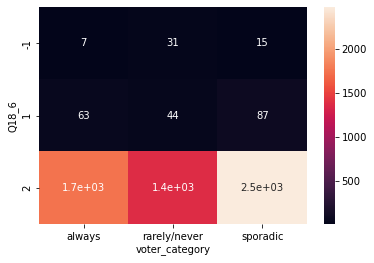

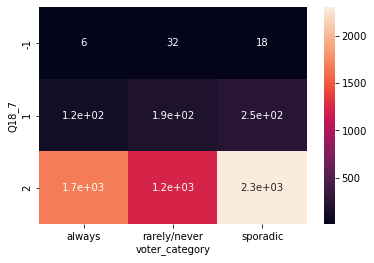

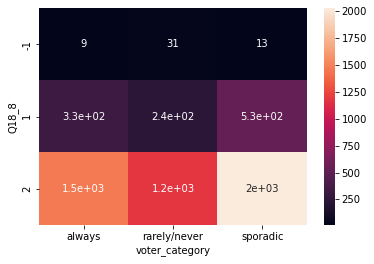

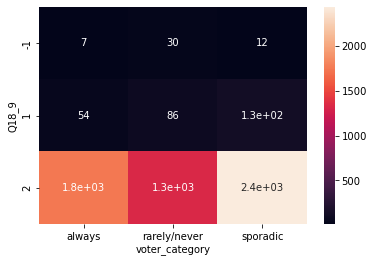

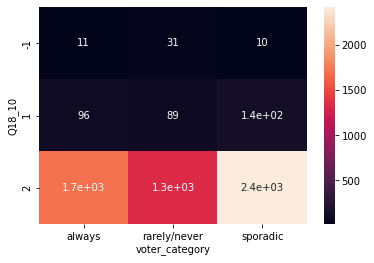

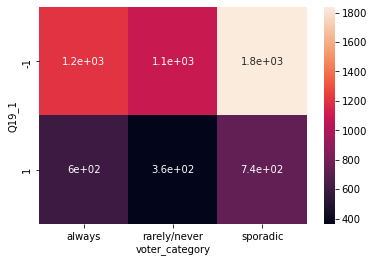

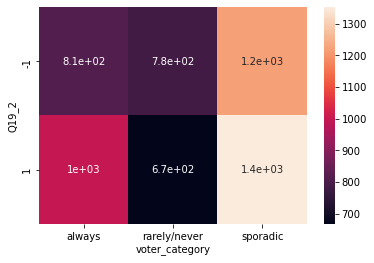

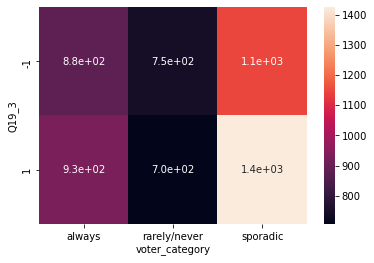

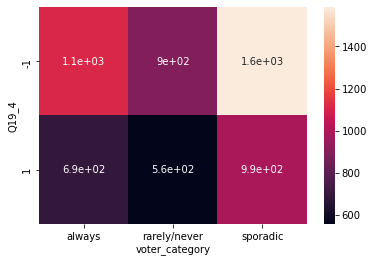

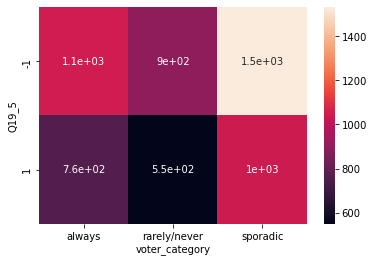

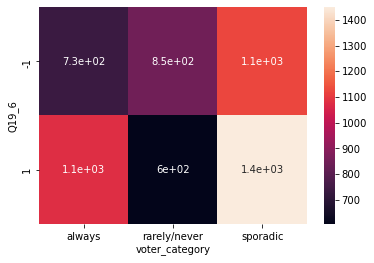

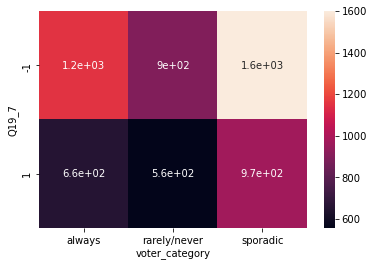

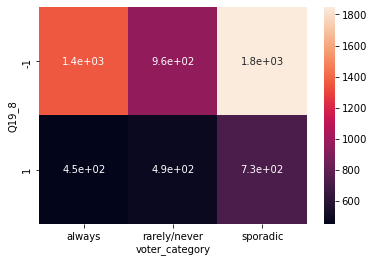

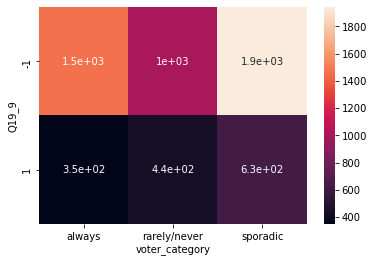

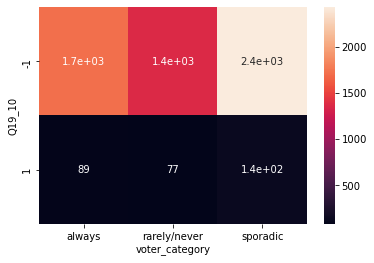

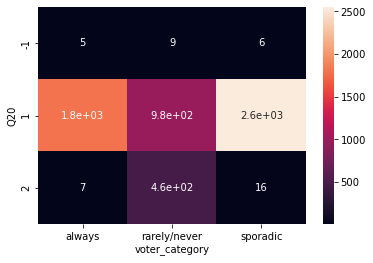

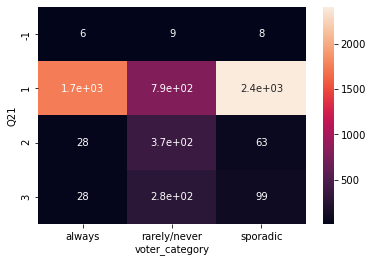

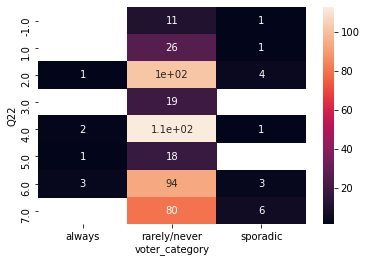

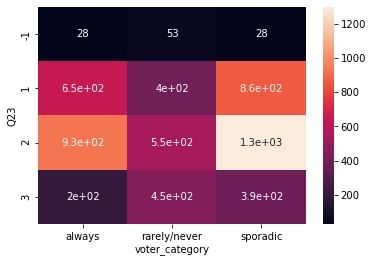

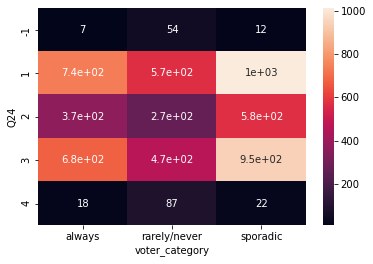

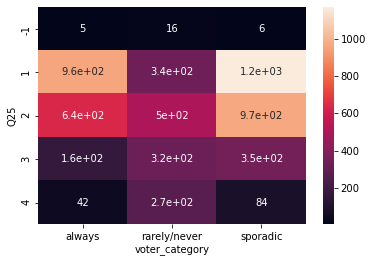

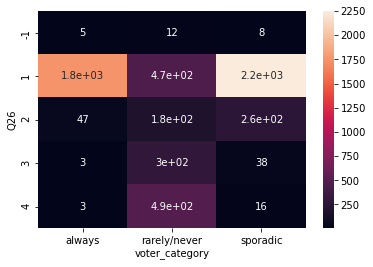

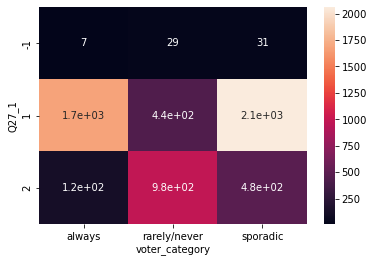

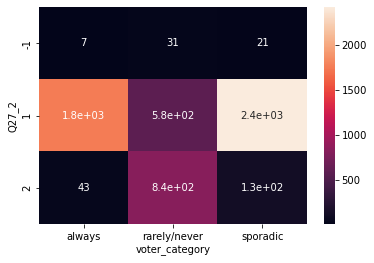

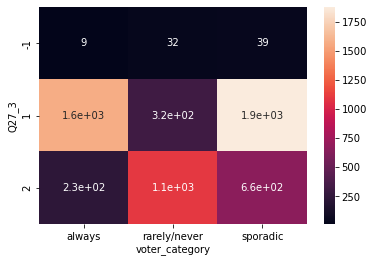

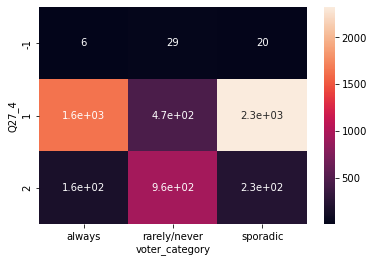

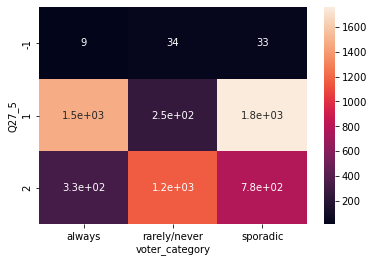

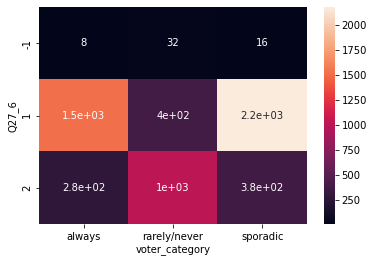

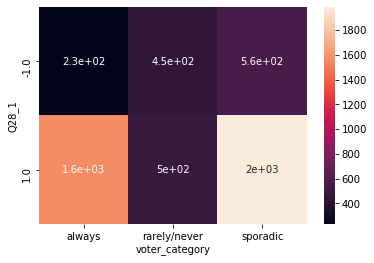

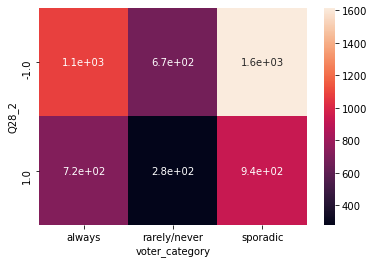

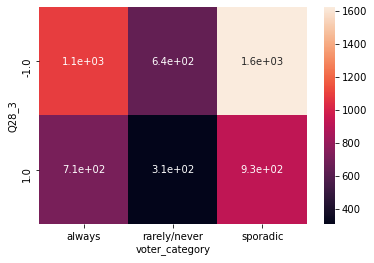

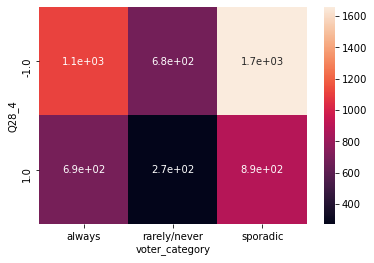

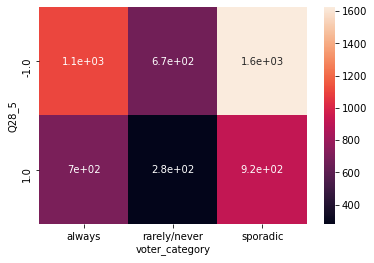

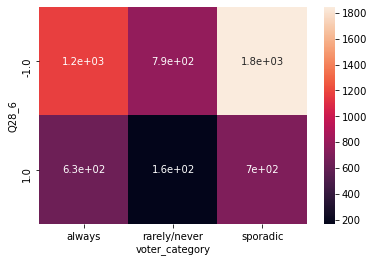

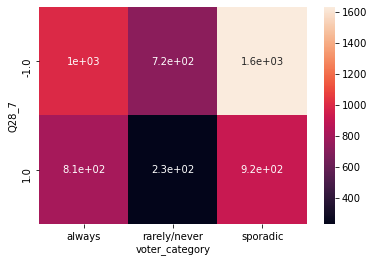

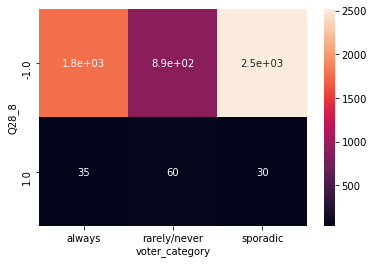

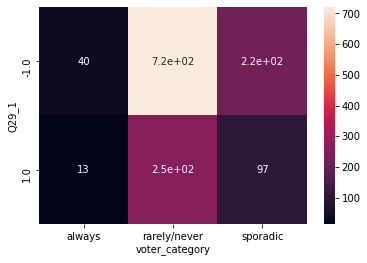

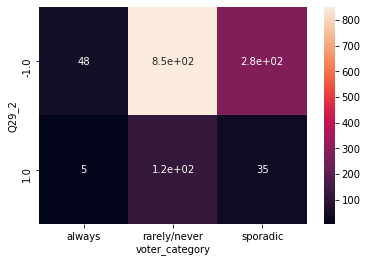

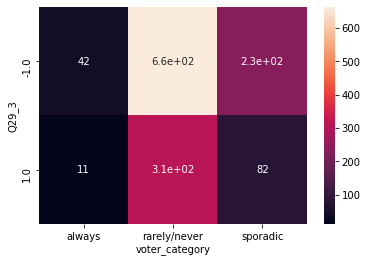

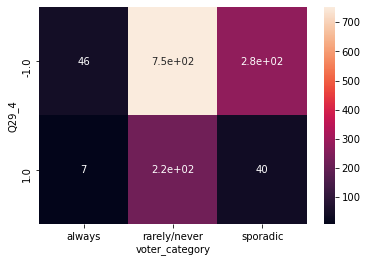

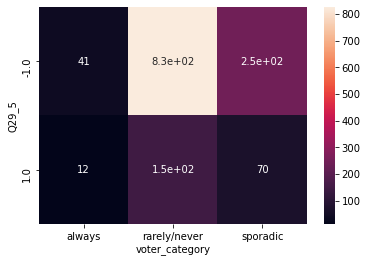

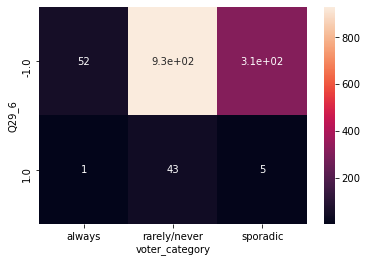

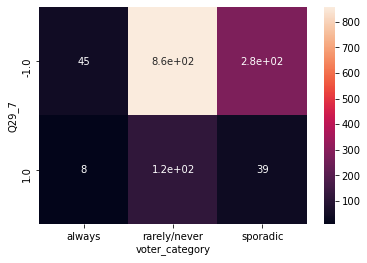

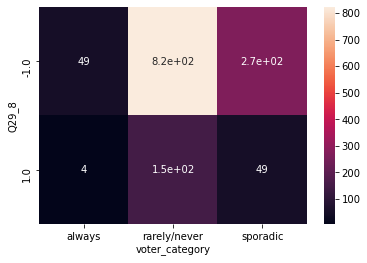

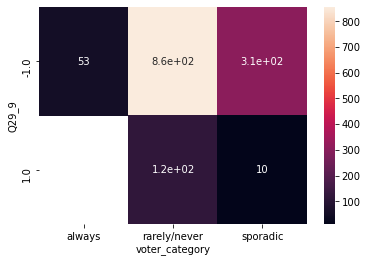

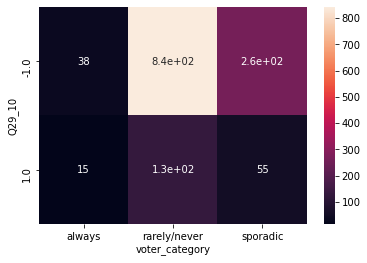

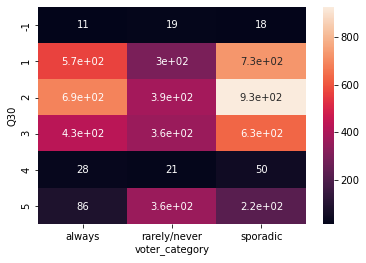

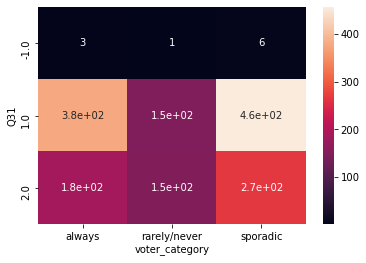

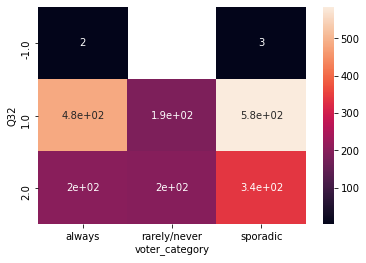

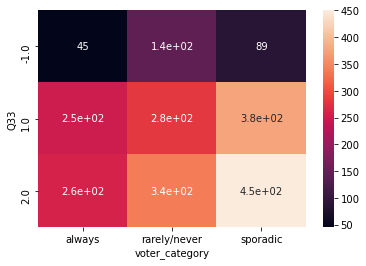

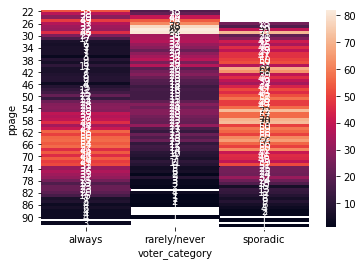

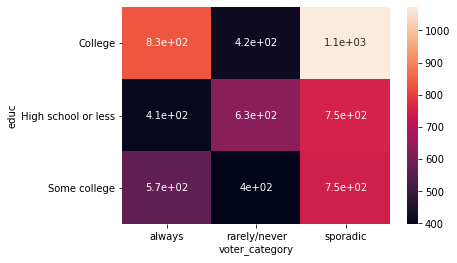

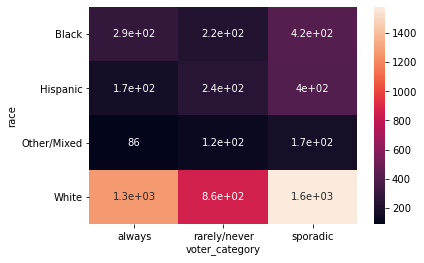

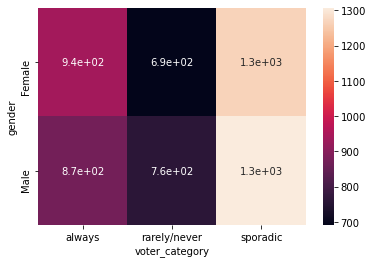

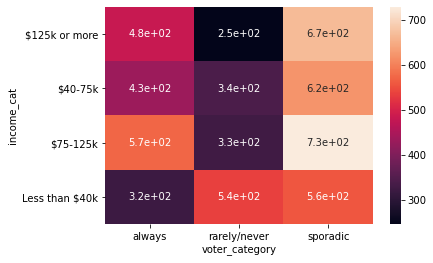

In [98]:
for i in features:
    make_heatmap(df, i, 'voter_category')

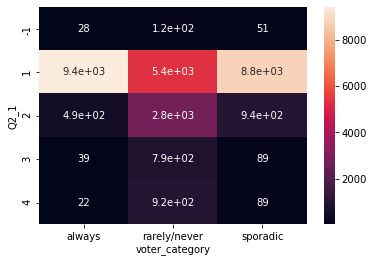

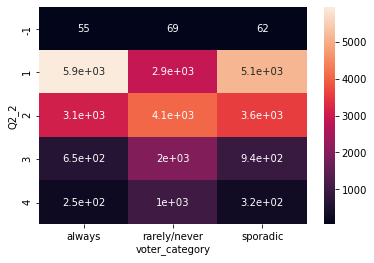

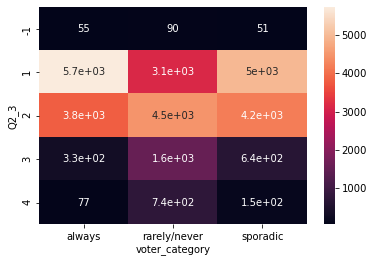

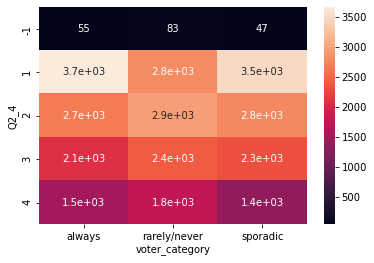

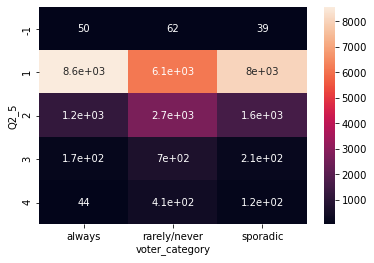

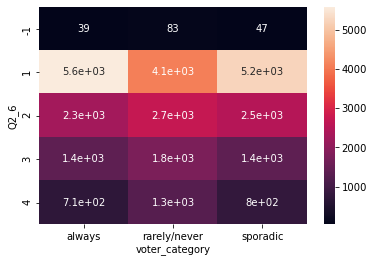

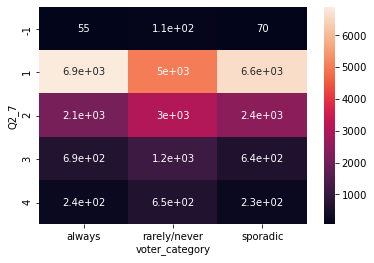

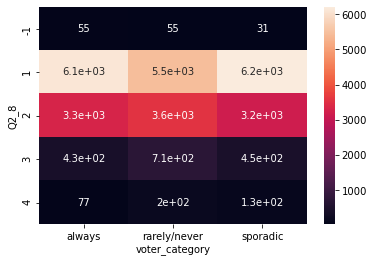

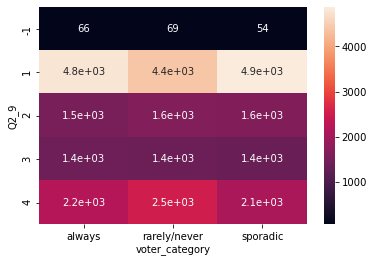

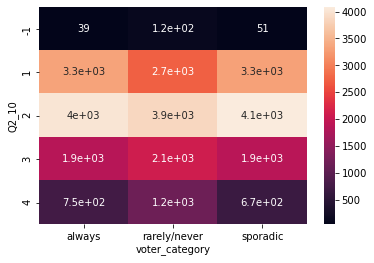

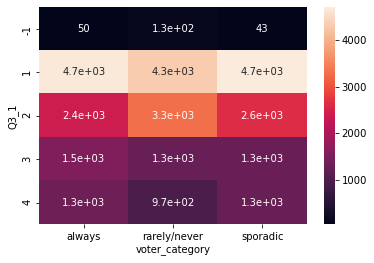

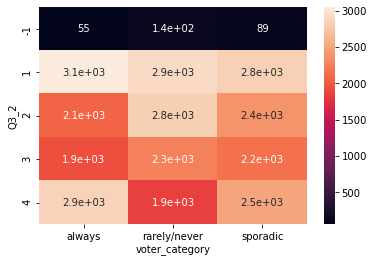

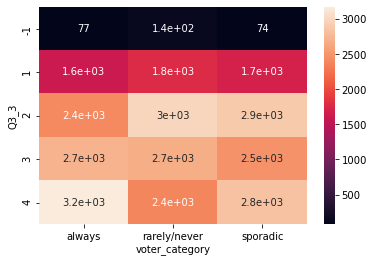

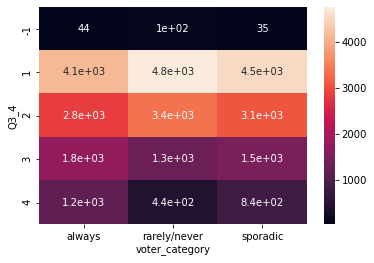

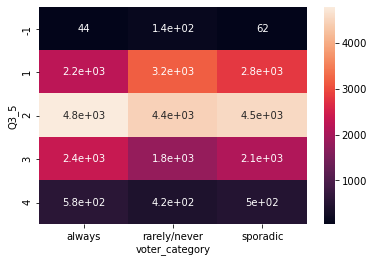

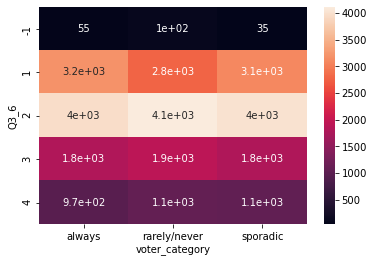

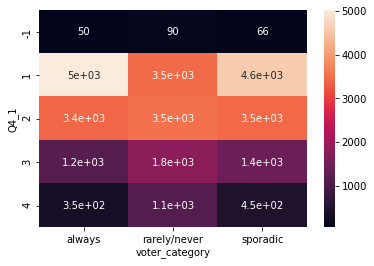

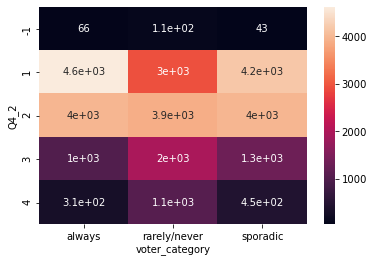

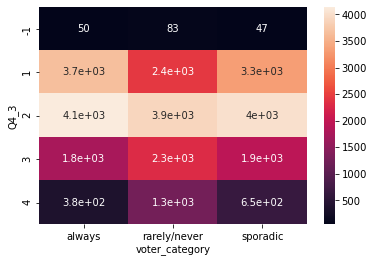

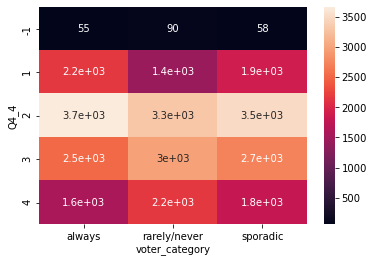

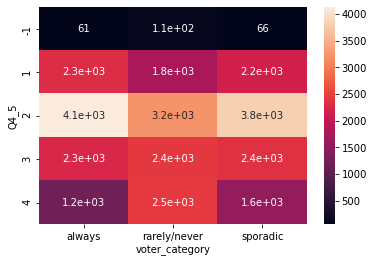

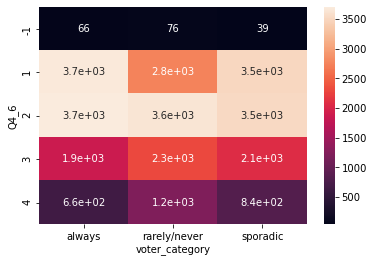

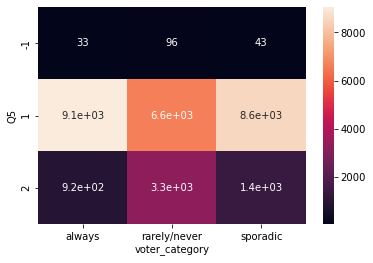

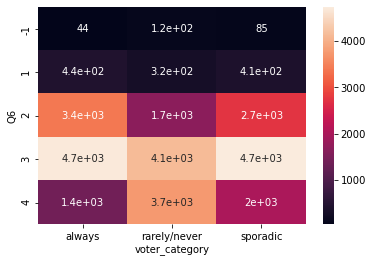

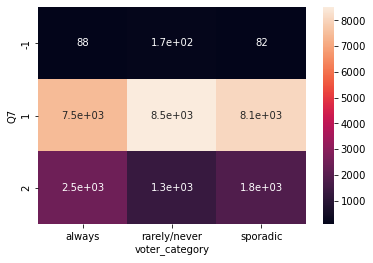

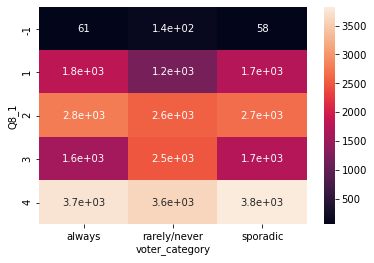

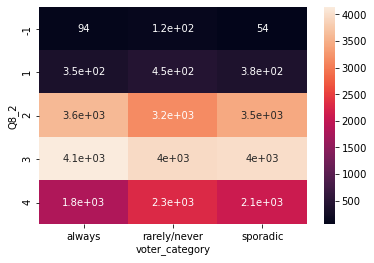

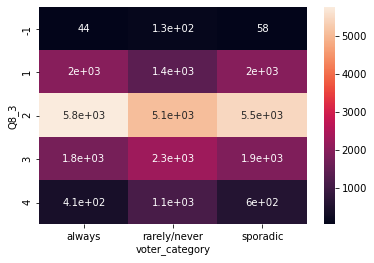

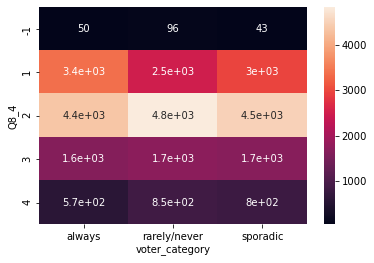

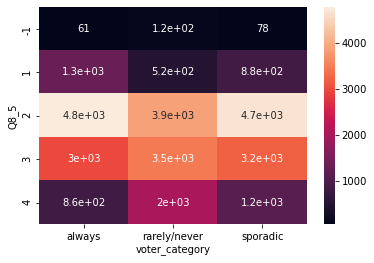

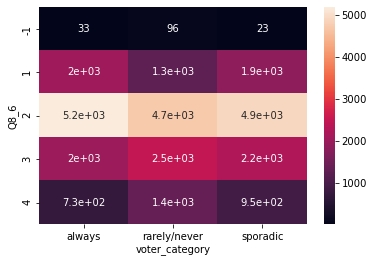

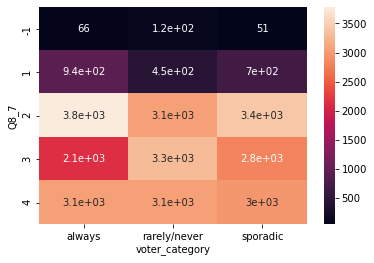

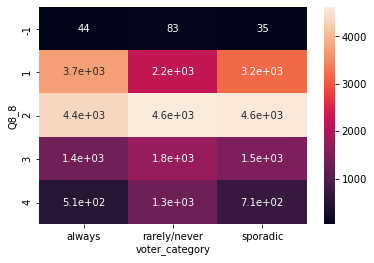

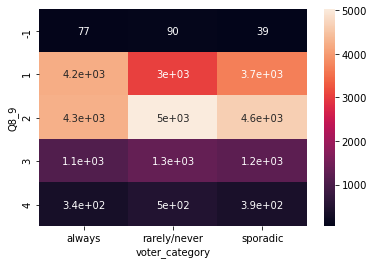

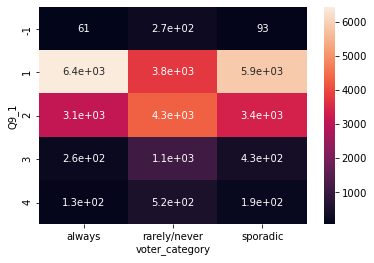

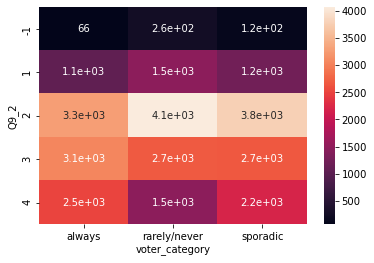

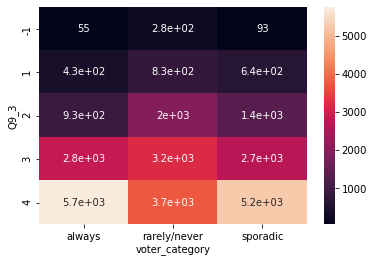

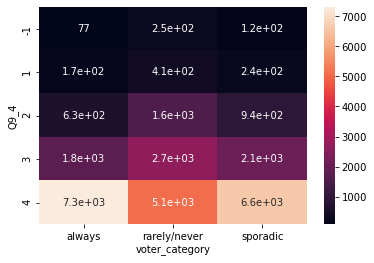

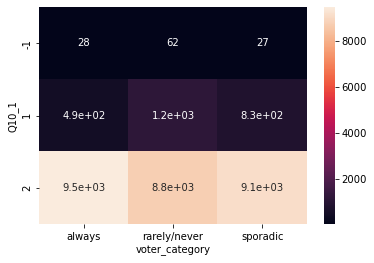

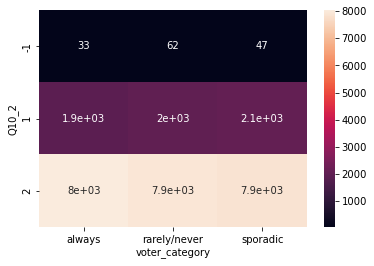

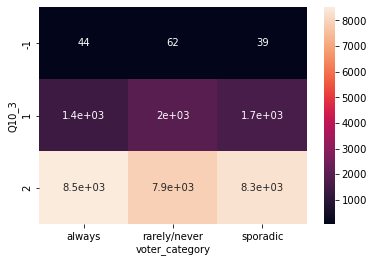

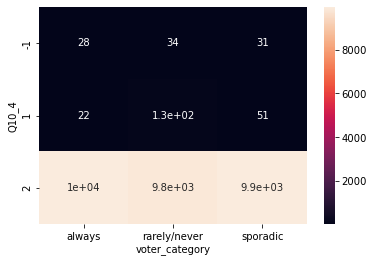

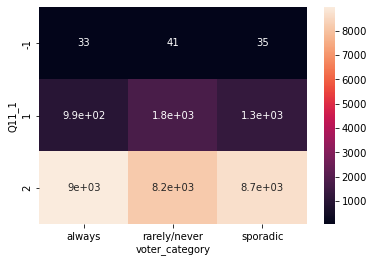

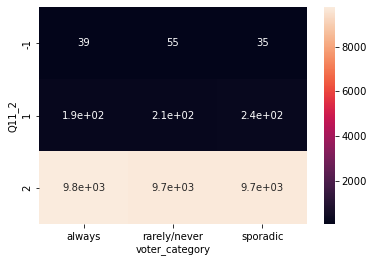

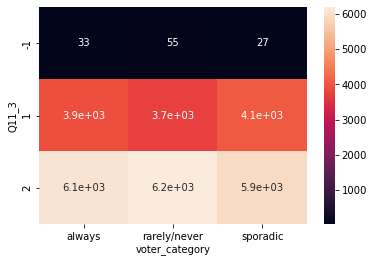

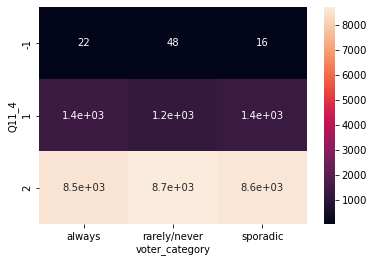

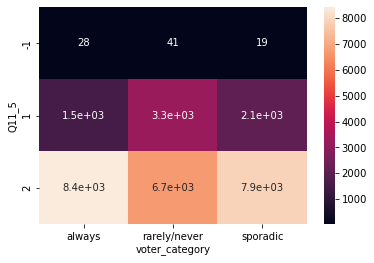

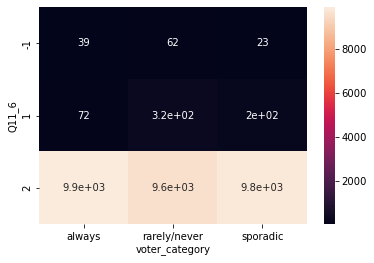

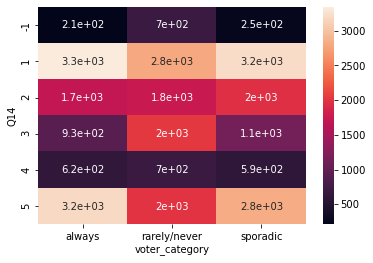

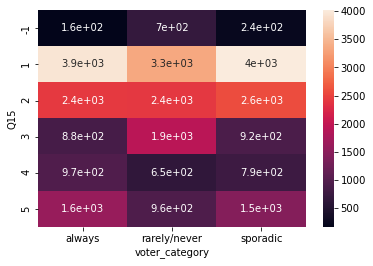

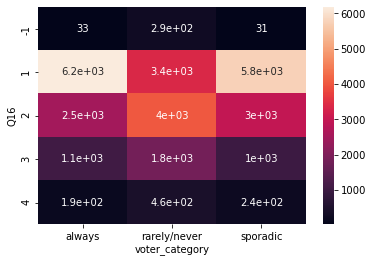

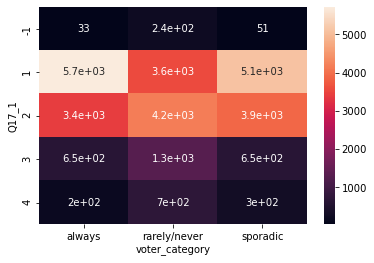

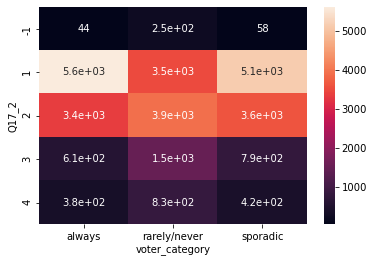

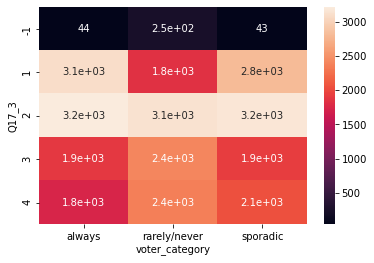

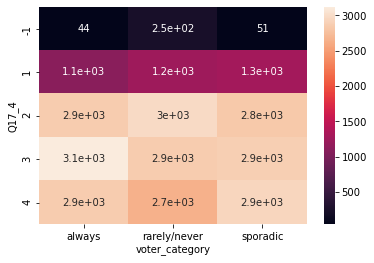

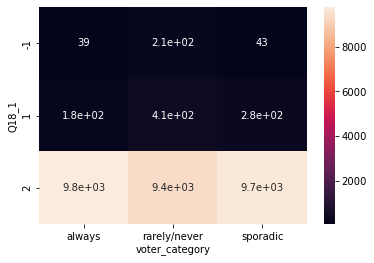

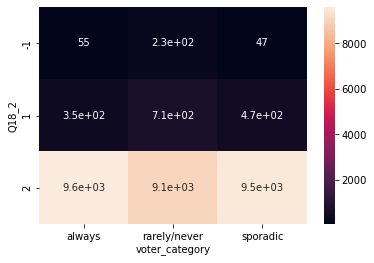

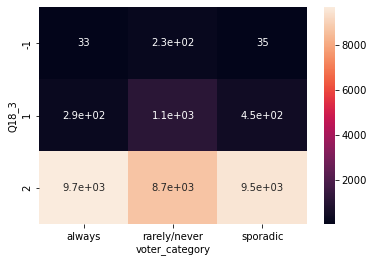

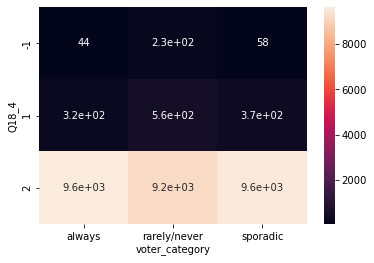

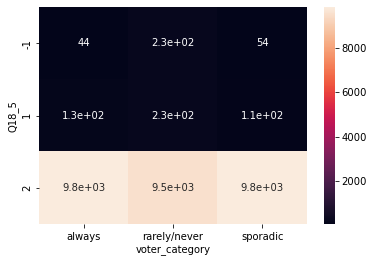

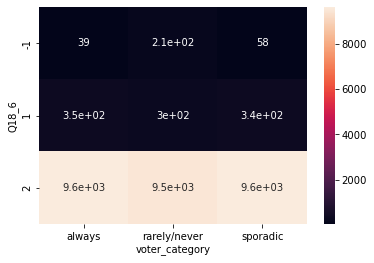

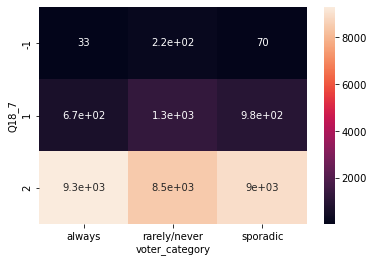

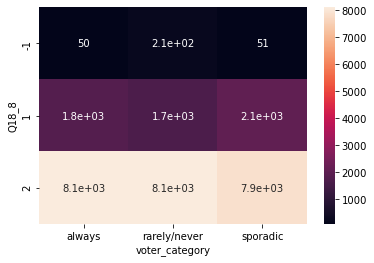

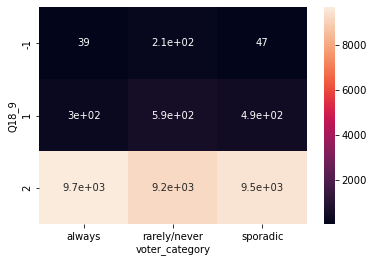

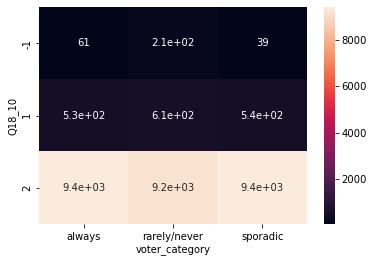

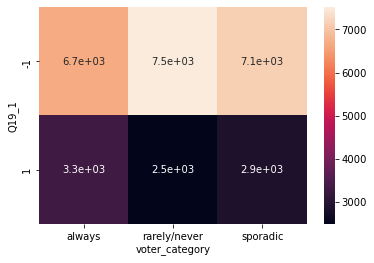

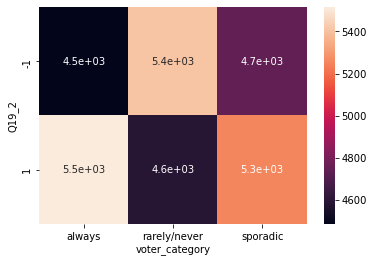

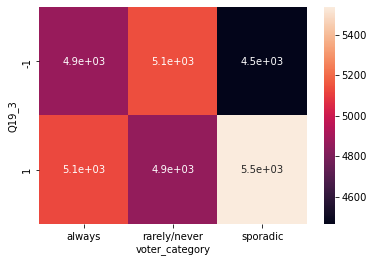

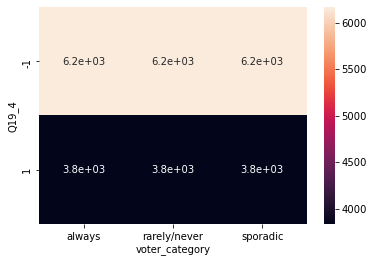

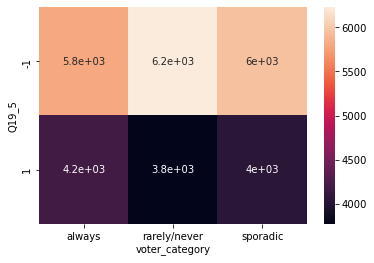

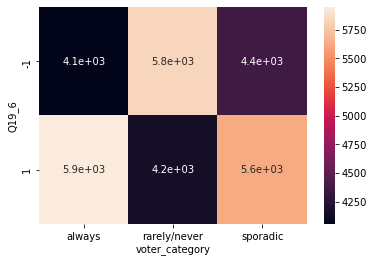

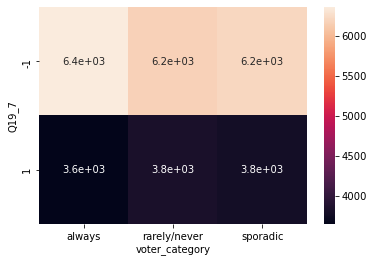

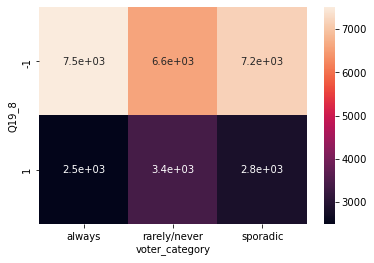

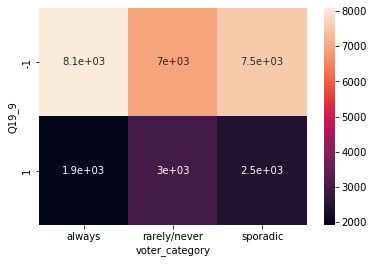

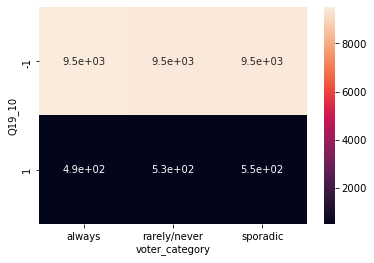

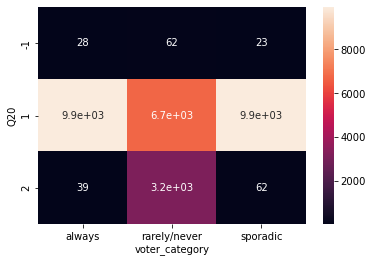

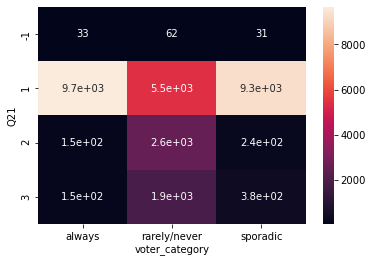

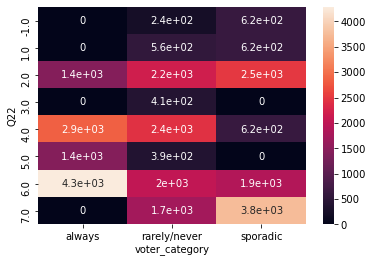

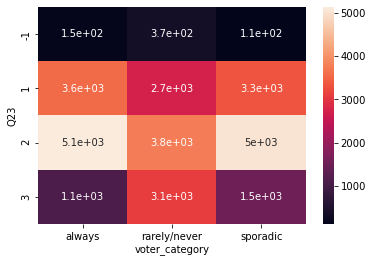

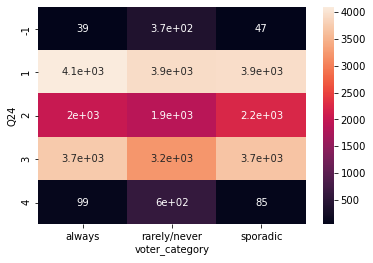

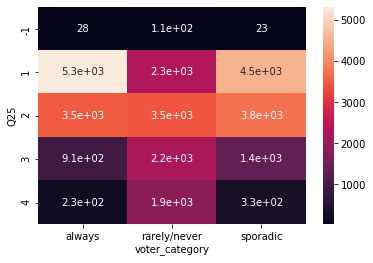

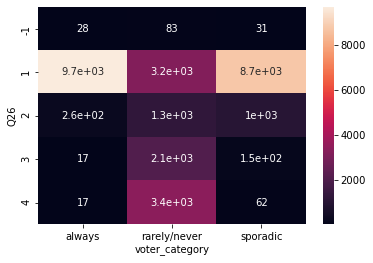

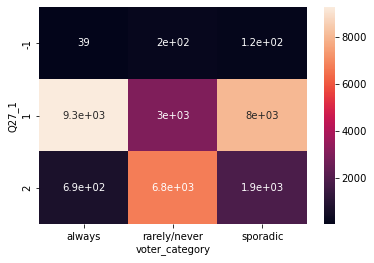

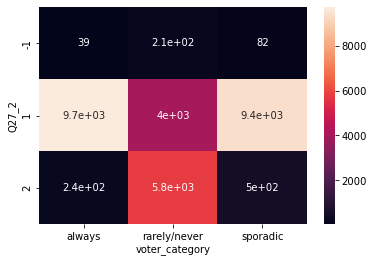

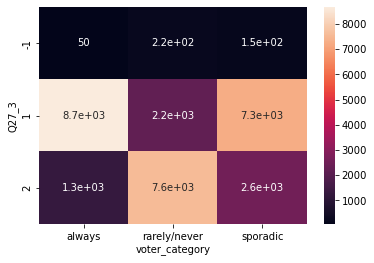

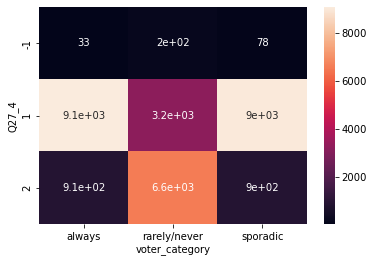

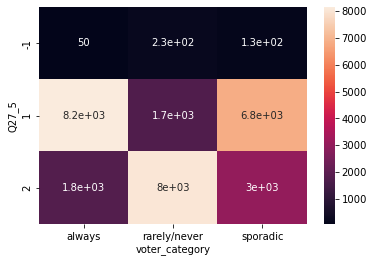

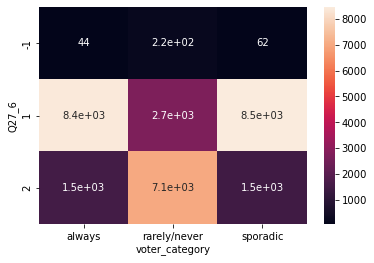

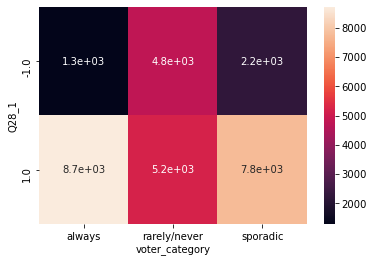

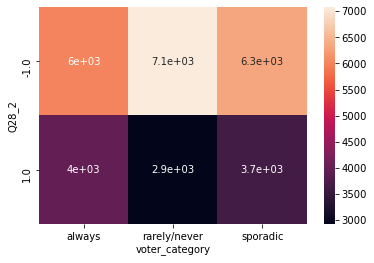

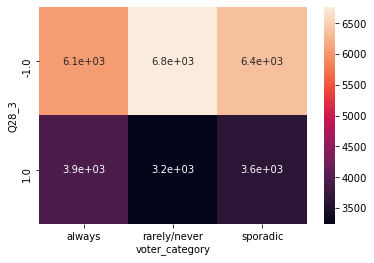

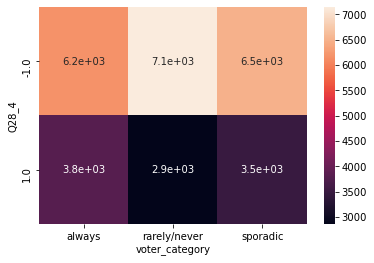

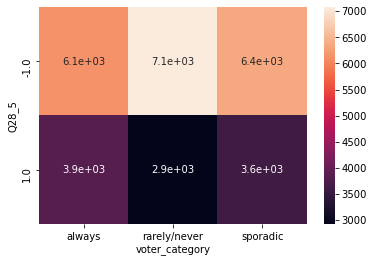

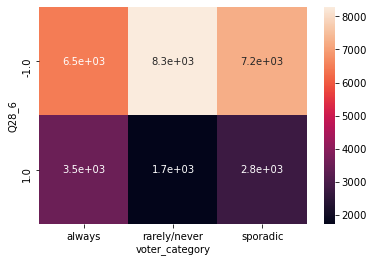

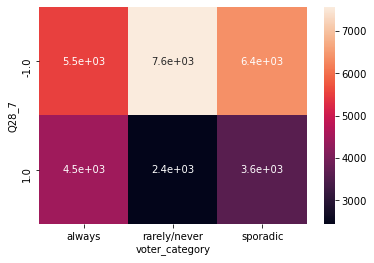

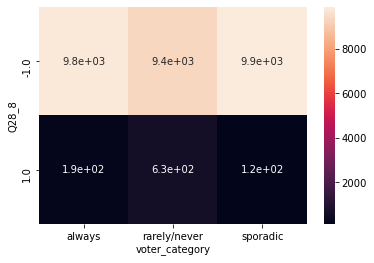

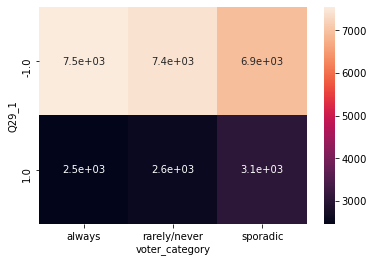

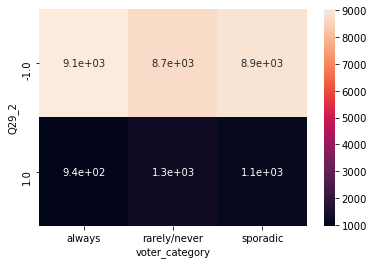

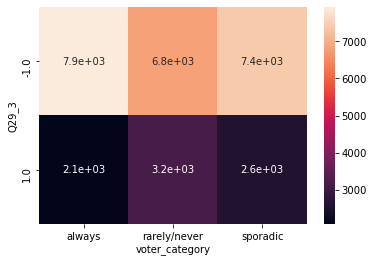

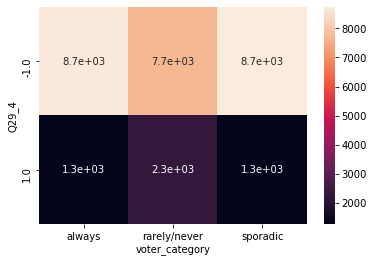

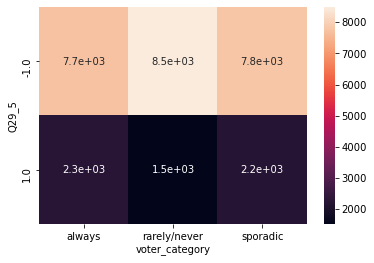

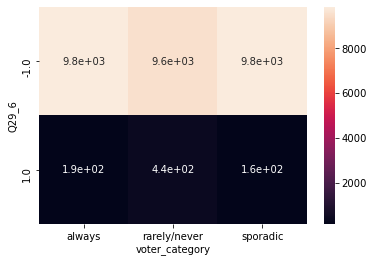

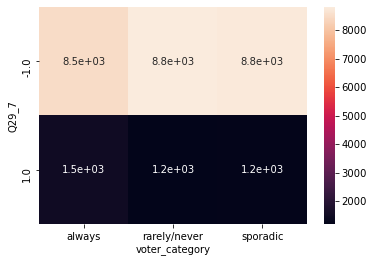

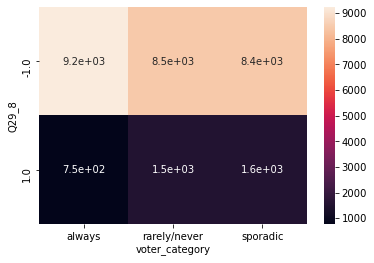

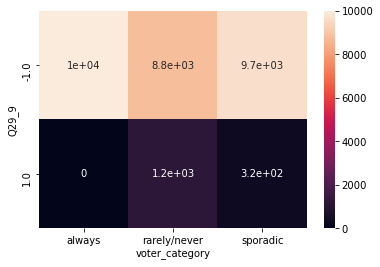

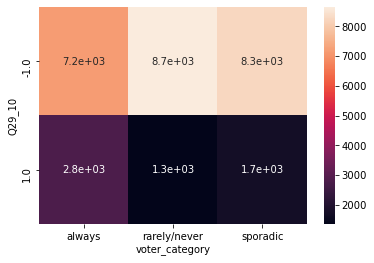

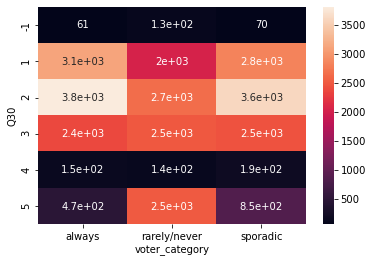

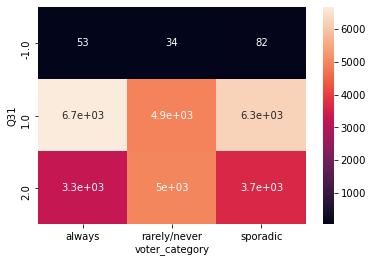

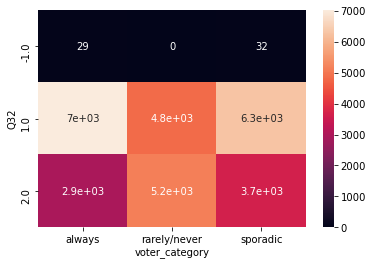

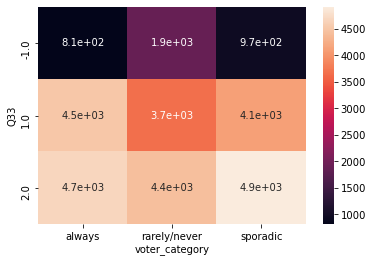

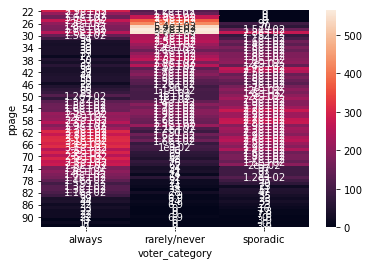

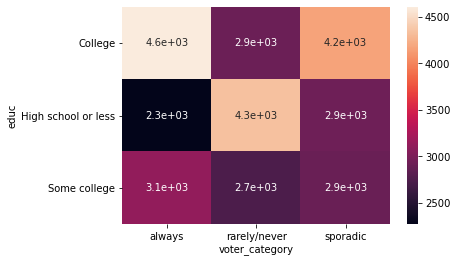

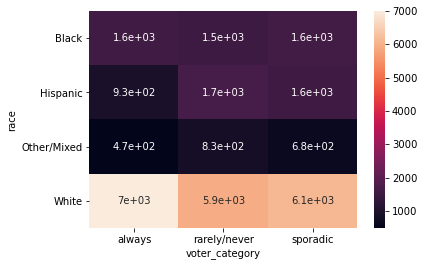

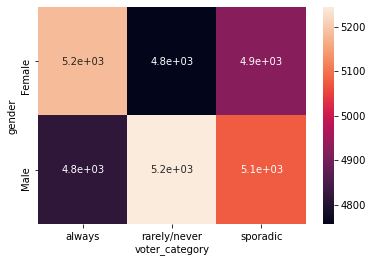

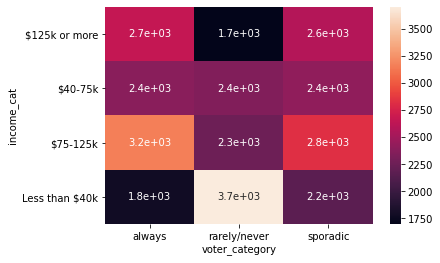

In [130]:
for i in features:
    make_heatmap(df, i, 'voter_category', normcol=True)